In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap ##HEATMAP (VISUALIZATIONS)
import folium #for MAPPING
import os

In [186]:
data = pd.read_json('amenities-vancouver.json.gz', orient='records', lines=True).dropna(axis=0) #json object per line (TRUE)
data 

,lat,lon,timestamp,amenity,name,tags
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ..."
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...
4,49.370898,-123.280448,2015-05-03T00:42:25.000-07:00,place_of_worship,St. Monica's Anglican Church,"{'addr:housenumber': '6404', 'addr:street': 'W..."
7,49.264041,-123.153407,2019-08-29T18:50:05.000-07:00,fuel,Shell,"{'brand:wikidata': 'Q154950', 'addr:housenumbe..."
13,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6..."
...,...,...,...,...,...,...
17712,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,House of Dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-..."
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{}
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'}
17716,49.282666,-122.826978,2019-09-13T13:56:49.000-07:00,pub,Brown's Social House,"{'addr:housenumber': '215', 'brewery': 'Guinne..."


In [187]:
#data.tags.unique() can't get dict type out

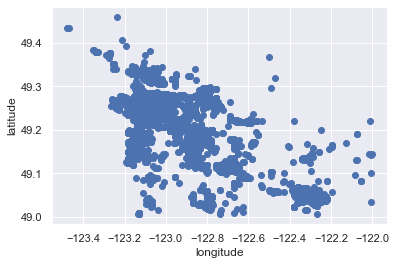

In [188]:
plt.scatter(x=data.lon, y=data.lat)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [189]:
"""question: some parts of the city with more chain restaurants (e.g. McDonand's or White Spot franchises, 
not independently-owned places): is that true? Is there 
some way to find the chain places automatically and visualize their density relative to non-chains? """

#GPS COORDINATES VANCOUVER https://www.latlong.net/place/vancouver-bc-canada-2279.html
VANCOUVER_COORDINATES = [49.24966,-123.11934] 

"all amenitiesabove "
#https://numpy.org/doc/stable/reference/generated/numpy.unique.html
ALL_AMENITIES = data.amenity.unique()
ALL_AMENITIES

array(['cafe', 'fast_food', 'place_of_worship', 'fuel', 'restaurant',
       'parking_entrance', 'pub', 'school', 'community_centre',
       'pharmacy', 'dentist', 'doctors', 'post_office', 'childcare',
       'public_building', 'bank', 'cinema', 'theatre', 'ferry_terminal',
       'bar', 'library', 'car_rental', 'bicycle_rental', 'clinic',
       'public_bookcase', 'university', 'dojo', 'toilets', 'arts_centre',
       'ice_cream', 'bench', 'shelter', 'bicycle_parking', 'recycling',
       'drinking_water', 'fountain', 'veterinary', 'bureau_de_change',
       'car_wash', 'nightclub', 'social_facility', 'post_box',
       'bus_station', 'college', 'construction', 'post_depot', 'atm',
       'nursery', 'clock', 'kindergarten', 'conference_centre',
       'vending_machine', 'car_sharing', 'marketplace', 'hospital',
       'taxi', 'police', 'fire_station', 'parking', 'motorcycle_parking',
       'charging_station', 'gambling', 'family_centre', 'townhall',
       'waste_basket', 'music_sch

# QUESTION 1: Chain vs Non-Chain - are some parts of the city with more chain restaurants 

# a) Get Restaurants

In [190]:
"""Here:
        1) Filter cafe, fast_food, restaurant, BISTRO  (not juice bar) 

"""
data_of_restaurants = data[ (data.amenity == 'cafe') | (data.amenity=='fast_food') |
                           (data.amenity == 'bistro') | (data.amenity == 'restaurant') ] 
    
#data_of_restaurants = data_of_restaurants.assign(total_branches=1)
    
NAMES_RESTAURANTS = data_of_restaurants.name
restaurant_data = data_of_restaurants[NAMES_RESTAURANTS.notna()] #need to remove NA
restaurant_data#.name.isna()
#np.size(restaurant_data.name.unique()) #3101


,lat,lon,timestamp,amenity,name,tags
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ..."
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...
13,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6..."
33,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b..."
52,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe..."
...,...,...,...,...,...,...
17707,49.263998,-123.173758,2019-06-08T06:31:22.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'website': 'http..."
17712,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,House of Dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-..."
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{}
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'}


In [191]:
#getting list of unique restaurant names
restaurantnames = restaurant_data.name.unique()
np.size(restaurantnames)

3101

In [192]:
restaurant_data = restaurant_data.assign(total_branches=1) #INSERT NEW COLUMN called total branches
"Counting # of chains by unique name."
count_of_each_restaurant = restaurant_data.groupby('name').count()
restaurant_data

,lat,lon,timestamp,amenity,name,tags,total_branches
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",1
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,1
13,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",1
33,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",1
52,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",1
...,...,...,...,...,...,...,...
17707,49.263998,-123.173758,2019-06-08T06:31:22.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'website': 'http...",1
17712,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,House of Dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-...",1
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{},1
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'},1


In [193]:
count_of_each_restaurant

,lat,lon,timestamp,amenity,tags,total_branches
name,,,,,,
0755 Restaurant & Lounge,1,1,1,1,1,1
1029 Cafe,1,1,1,1,1,1
16th Avenue Cafe,1,1,1,1,1,1
17°C Dessert Café,1,1,1,1,1,1
1827,1,1,1,1,1,1
...,...,...,...,...,...,...
strEATS Aldergrove,1,1,1,1,1,1
trattoria Burnaby,1,1,1,1,1,1
yoko sushi,1,1,1,1,1,1


In [194]:
"Maps the total number of branches to the name of the restaurant for any given restaurant"
def get_restaurant_count(name, df):
    return df['total_branches'].loc[name] #take the name as we need the name

In [195]:
restaurant_data['total_branches'] = restaurant_data['name'].apply(get_restaurant_count, df=count_of_each_restaurant) 
#3101 in count
restaurant_data

,lat,lon,timestamp,amenity,name,tags,total_branches
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",217
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,2
13,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",1
33,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",124
52,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",124
...,...,...,...,...,...,...,...
17707,49.263998,-123.173758,2019-06-08T06:31:22.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'website': 'http...",177
17712,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,House of Dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-...",1
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{},1
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'},5


# b) Split - Chain and Non-Chain

In [196]:
non_chain_restaurant = restaurant_data[restaurant_data['total_branches'] == 1]
non_chain_restaurant

,lat,lon,timestamp,amenity,name,tags,total_branches
13,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",1
58,49.171276,-123.134873,2019-10-27T17:08:25.000-07:00,restaurant,Oriental Rice Noodle,"{'addr:housenumber': '8100', 'phone': '+1-604-...",1
89,49.148619,-123.135892,2009-09-01T22:49:26.000-07:00,fast_food,Pizza Hut (takeout),{},1
115,49.268572,-123.104526,2018-10-26T20:30:44.000-07:00,cafe,Argo Cafe,"{'addr:housenumber': '1836', 'addr:street': 'O...",1
300,49.281302,-123.057558,2019-09-13T13:57:03.000-07:00,restaurant,Tacofino Commissary,"{'addr:housenumber': '2327', 'addr:street': 'E...",1
...,...,...,...,...,...,...,...
17699,49.219011,-122.928008,2018-02-12T04:09:16.000-08:00,cafe,Raw Cuts Sandwich Shop,"{'addr:housenumber': '7885', 'level': '0', 'ad...",1
17701,49.262659,-123.251745,2019-11-04T20:07:41.000-08:00,cafe,Magma Cafè,"{'wheelchair': 'yes', 'addr:housenumber': '633...",1
17712,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,House of Dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-...",1
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{},1


In [197]:
non_chain_restaurant.name.unique()

array(['Best Bite Indian Cuisine', 'Oriental Rice Noodle',
       'Pizza Hut (takeout)', ..., 'House of Dosas', 'Creekside Coffee',
       "Gallagher's Cafe"], dtype=object)

In [198]:
non_chain_restaurant.name.nunique()

2768

In [199]:
chain_restaurants = restaurant_data[restaurant_data['total_branches'] > 1]
chain_restaurants

,lat,lon,timestamp,amenity,name,tags,total_branches
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",217
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,2
33,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",124
52,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",124
54,49.212449,-122.919749,2019-07-02T01:10:30.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'website': 'http...",124
...,...,...,...,...,...,...,...
17677,49.133918,-122.855350,2020-03-28T04:12:53.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'cuisine': 'sand...",177
17689,49.233313,-123.117346,2019-08-29T17:49:06.000-07:00,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'addr:housenumb...",26
17706,49.264044,-123.174166,2019-09-13T13:56:49.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",124
17707,49.263998,-123.173758,2019-06-08T06:31:22.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'website': 'http...",177


In [200]:
#chain_restaurants.total_branches.max() 217

In [201]:
chain_restaurants.name.nunique()

333

In [202]:
chain_restaurants.total_branches.sum()

110313

In [203]:
chain_restaurants.name.unique()

array(['Starbucks', 'Salad Loop', 'Tim Hortons', "Nando's",
       'Boston Pizza', "McDonald's", 'Waves', 'Subway', 'KFC',
       'Burger King', "Triple O's", 'Peaceful Restaurant', 'Pho 99',
       'Waves Coffee', "Tokyo Joe's", 'Cactus Club Cafe', 'Cora',
       'Chatime', 'Red Burrito', 'Pita Pit', 'Umami Sushi', 'Ramen Koika',
       "Deacon's Corner", 'A&W', 'Elysian Coffee Roasters', "Triple-O's",
       'Caffe Artigiano', 'Virtuous Pie', 'Blenz', 'Gong Cha',
       "The Captain's Boil", 'Caffè Artigiano', 'Neptune Wonton Noodle',
       'Panago Pizza', 'Tacofino', 'Hanami', 'Round Table Pizza',
       'Taco Del Mar', 'Pizza Hut', "Montana's", 'Mucho Burrito',
       'Five Guys', 'Sushi Mori', 'Sun Sui Wah Seafood Restaurant',
       'Dairy Queen', 'Quiznos', 'Panago', 'Booster Juice', 'Freshslice',
       'Donair Spot', 'Freshslice Pizza', 'DQ Orange Julius',
       'New York Fries', 'OPA! of Greece', 'Manchu Wok', 'Thaï Express',
       'Chongqing', 'Bob Likes Thai Food', 'Tast

In [204]:
chain_restaurants.amenity.unique()

array(['cafe', 'fast_food', 'restaurant'], dtype=object)

# q2 (Prob B) Categories of Chain Restaurant

# 1. Coffee Chain (Cafe) - part of q2

In [205]:
coffee_chain = chain_restaurants[chain_restaurants.amenity == 'cafe']
all_coffee_chains = coffee_chain.loc[:,['name','lat','lon']]#.value_counts().to_frame() #> 1
#all_restaurants.columns=['count'] #rename column
coordinates_coffee_chain = all_coffee_chains[['lat', 'lon']].values.tolist()
#all_restaurants
coffee_chain


,lat,lon,timestamp,amenity,name,tags,total_branches
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",217
33,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",124
52,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",124
54,49.212449,-122.919749,2019-07-02T01:10:30.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'website': 'http...",124
55,49.212659,-122.919347,2019-07-02T01:10:30.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",217
...,...,...,...,...,...,...,...
17631,49.227010,-123.128733,2019-07-16T20:38:16.000-07:00,cafe,Jazen Tea,"{'cuisine': 'bubble_tea;smoothie;fruit_tea', '...",2
17646,49.263792,-123.140062,2019-09-13T13:57:05.000-07:00,cafe,Chatime,"{'brand:wikidata': 'Q16829306', 'brand:en': 'C...",9
17649,49.050981,-122.324678,2019-09-02T22:08:25.000-07:00,cafe,Starbucks,"{'addr:housenumber': '32470', 'website': 'http...",217
17656,49.050268,-122.318867,2019-10-29T04:00:37.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",217


In [206]:
#have decalred coordinates above
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
#incidents = folium.map.FeatureGroup()

van_map

In [207]:
HeatMap(coordinates_coffee_chain).add_to(van_map)

In [208]:
"heat map of coffee chains"
van_map

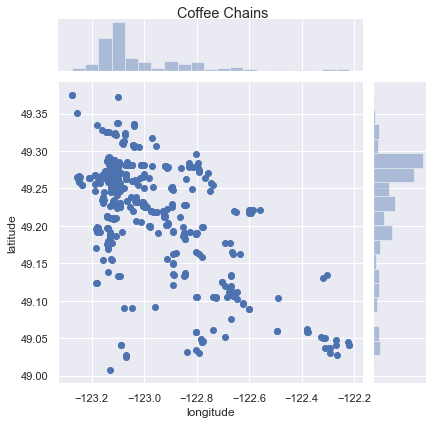

In [209]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=coffee_chain)
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.suptitle('Coffee Chains')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plot

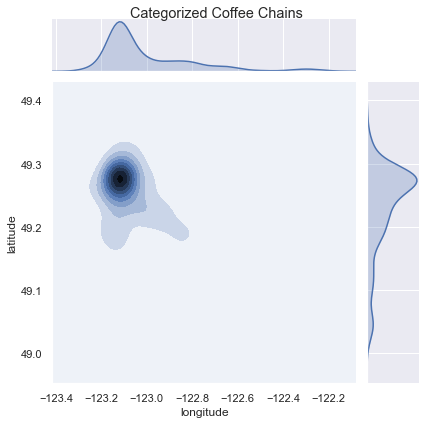

In [210]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=coffee_chain,kind='kde')
plot.fig.suptitle('Categorized Coffee Chains')
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plot

In [211]:
print("The average latitude (statistics performed) of categorized chains which are coffee chains is: ", 
      coffee_chain['lat'].mean())
print("The average longitude (statistics performed) of categorized chains which are coffee chains is: ", 
      coffee_chain['lon'].mean())
#print("The average latitude (statistics performed) of categorized chains which are restaurants is: ", 
#      all_restaurant_chain['lat'].mean())

The average latitude (statistics performed) of categorized chains which are coffee chains is:  49.2296298353591
The average longitude (statistics performed) of categorized chains which are coffee chains is:  -123.00150795303863


In [212]:
print("The sd latitude (statistics performed) of categorized chains which are coffee chains is: ", 
      coffee_chain['lat'].std())
print("The sd longitude (statistics performed) of categorized chains which are coffee chains is: ", 
      coffee_chain['lon'].std())

The sd latitude (statistics performed) of categorized chains which are coffee chains is:  0.07185455181769064
The sd longitude (statistics performed) of categorized chains which are coffee chains is:  0.20266334088730834


In [213]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
#coordinates_coffee_chain = all_coffee_chains[['lat', 'lon']].values.tolist()

for i in range(0, len(coordinates_coffee_chain)):
    folium.Marker(coordinates_coffee_chain[i]).add_to(van_map)
van_map

# 2. Fast Food Chain (Fast Food) - part of q2

In [214]:
fast_food_chain = chain_restaurants[chain_restaurants.amenity == 'fast_food']
#fast_food_chain
#fast_food_chain[fast_food_chain.name == 'A&W'] ttoal 55 branches yeah
#total_branches_by_name.values.tolist()
all_fastfood_chain = fast_food_chain.loc[:,['name','lat','lon']]#.value_counts().to_frame() #> 1
#all_restaurants.columns=['count'] #rename column
coordinates_fastfood_chain = all_fastfood_chain[['lat', 'lon']].values.tolist()
#all_restaurants
fast_food_chain


,lat,lon,timestamp,amenity,name,tags,total_branches
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,2
67,49.234749,-123.154725,2019-09-24T19:58:50.000-07:00,fast_food,McDonald's,"{'brand:wikidata': 'Q38076', 'wheelchair': 'ye...",59
84,49.140146,-123.137885,2014-08-23T05:24:32.000-07:00,fast_food,Subway,{'cuisine': 'sub'},177
88,49.139861,-123.137394,2019-02-27T00:17:55.000-08:00,fast_food,KFC,"{'brand:wikidata': 'Q524757', 'cuisine': 'chic...",20
90,49.133085,-123.094087,2019-08-24T15:12:34.000-07:00,fast_food,McDonald's,"{'brand:wikidata': 'Q38076', 'website': 'http:...",59
...,...,...,...,...,...,...,...
17637,49.266802,-123.004054,2020-03-03T02:18:15.000-08:00,fast_food,Pacific Poke,"{'addr:province': 'BC', 'cuisine': 'poke', 'ad...",5
17643,49.266804,-123.004153,2020-03-03T02:18:15.000-08:00,fast_food,Pizza Pizza,"{'brand:wikidata': 'Q1194143', 'addr:province'...",5
17653,49.050396,-122.327579,2019-09-02T22:08:25.000-07:00,fast_food,Booster Juice,"{'brand:wikidata': 'Q4943796', 'website': 'htt...",14
17677,49.133918,-122.855350,2020-03-28T04:12:53.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'cuisine': 'sand...",177


In [215]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
HeatMap(coordinates_fastfood_chain).add_to(van_map)
van_map

In [216]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
#coordinates_coffee_chain = all_coffee_chains[['lat', 'lon']].values.tolist()

for i in range(0, len(coordinates_fastfood_chain)):
    folium.Marker(coordinates_fastfood_chain[i]).add_to(van_map)
van_map

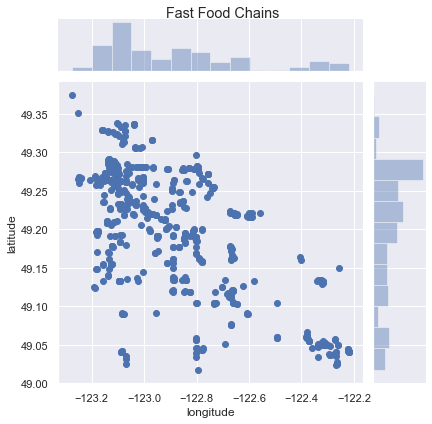

In [217]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=fast_food_chain)
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.suptitle('Fast Food Chains')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plot

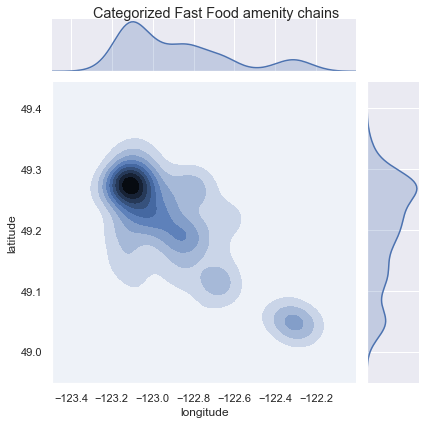

In [218]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=fast_food_chain,kind='kde')
plot.fig.suptitle('Categorized Fast Food amenity chains')
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plot

In [219]:
all_fastfood_chain

,name,lat,lon
1,Salad Loop,49.260953,-123.125704
67,McDonald's,49.234749,-123.154725
84,Subway,49.140146,-123.137885
88,KFC,49.139861,-123.137394
90,McDonald's,49.133085,-123.094087
...,...,...,...
17637,Pacific Poke,49.266802,-123.004054
17643,Pizza Pizza,49.266804,-123.004153
17653,Booster Juice,49.050396,-122.327579
17677,Subway,49.133918,-122.855350


In [220]:
print("The average latitude (statistics performed) of FAST FOOD chains is: ", 
      all_fastfood_chain['lat'].mean())

#print("The average latitude (statistics performed) of categorized chains which are restaurants is: ", 
#      all_restaurant_chain['lat'].mean())

print("The average longitude (statistics performed) of FAST FOOD  chains is: ", 
      all_fastfood_chain['lon'].mean())

print("The std dev of latitude (statistics performed) of categorized chains which are FAST FOOD chains is: ", 
      all_fastfood_chain['lat'].std())
print("The std dev of longitude (statistics performed) of categorized chains which are FAST FOO chains is: ", 
      all_fastfood_chain['lon'].std())

The average latitude (statistics performed) of FAST FOOD chains is:  49.19859828193886
The average longitude (statistics performed) of FAST FOOD  chains is:  -122.88867970172649
The std dev of latitude (statistics performed) of categorized chains which are FAST FOOD chains is:  0.08253760212453104
The std dev of longitude (statistics performed) of categorized chains which are FAST FOO chains is:  0.2645625880206729


# q1 contd (above q2) 3. RESTAURANT Chain (ONLY ** Restaurant)

In [221]:
"these are all chains ***** (uncategorized)"
chain_restaurants


,lat,lon,timestamp,amenity,name,tags,total_branches
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",217
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,2
33,49.193580,-123.180788,2019-09-14T05:00:22.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'level': '0', 'b...",124
52,49.228400,-122.848383,2019-11-20T11:48:37.000-08:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",124
54,49.212449,-122.919749,2019-07-02T01:10:30.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'website': 'http...",124
...,...,...,...,...,...,...,...
17677,49.133918,-122.855350,2020-03-28T04:12:53.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'cuisine': 'sand...",177
17689,49.233313,-123.117346,2019-08-29T17:49:06.000-07:00,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'addr:housenumb...",26
17706,49.264044,-123.174166,2019-09-13T13:56:49.000-07:00,cafe,Tim Hortons,"{'brand:wikidata': 'Q175106', 'addr:housenumbe...",124
17707,49.263998,-123.173758,2019-06-08T06:31:22.000-07:00,fast_food,Subway,"{'brand:wikidata': 'Q244457', 'website': 'http...",177


# HEAT AND FOLIUM MAP CHAIN

In [222]:
"these are all chains ***** (uncategorized)"
coordinates_chain_restaurants = chain_restaurants[['lat', 'lon']].values.tolist()
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
HeatMap(coordinates_chain_restaurants).add_to(van_map)
van_map

In [223]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
coordinates_chain_restaurants = chain_restaurants[['lat', 'lon']].values.tolist()
for i in range(0, len(coordinates_chain_restaurants)):
    folium.Marker(coordinates_chain_restaurants[i]).add_to(van_map)
van_map

#  QUESTION 2 continued CATEGORY SUBSET OF CHAIN = RESTAURANT 

In [224]:
restaurant_chain = chain_restaurants[chain_restaurants.amenity == 'restaurant']

all_restaurant_chain = restaurant_chain.loc[:,['name','lat','lon']]#.value_counts().to_frame() #> 1
#all_restaurants.columns=['count'] #rename column
coordinates_restaurant_chain = all_restaurant_chain[['lat', 'lon']].values.tolist()
#all_restaurant_chain
#coordinates_restaurant_chain
restaurant_chain
#"same as fast food"


,lat,lon,timestamp,amenity,name,tags,total_branches
65,49.132705,-123.099186,2019-08-24T15:12:34.000-07:00,restaurant,Nando's,"{'brand:wikidata': 'Q3472954', 'cuisine': 'chi...",14
66,49.133010,-123.095536,2019-08-24T15:12:34.000-07:00,restaurant,Boston Pizza,"{'brand:wikidata': 'Q894578', 'cuisine': 'pizz...",18
121,49.266575,-123.103744,2018-10-26T20:30:44.000-07:00,restaurant,Peaceful Restaurant,{'opening_hours': 'Su-Th 11:00-21:30; Fr-Sa 11...,5
253,49.277918,-122.912361,2019-11-14T08:54:00.000-08:00,restaurant,Pho 99,"{'addr:housenumber': '8901', 'addr:street': 'C...",4
322,49.172095,-123.133608,2019-09-13T13:57:04.000-07:00,restaurant,Tokyo Joe's,"{'addr:housenumber': '8211', 'addr:street': 'A...",2
...,...,...,...,...,...,...,...
17644,49.025522,-123.067520,2020-04-28T00:17:48.000-07:00,restaurant,Chopped Leaf,"{'addr:province': 'BC', 'addr:housenumber': '1...",13
17648,49.254363,-123.236232,2019-04-29T21:29:21.000-07:00,restaurant,Chef Hung Taiwanese Beef Noodle,"{'addr:housenumber': '3313', 'website': 'https...",2
17650,49.050282,-122.326017,2019-09-02T22:08:25.000-07:00,restaurant,Wok Box,"{'delivery': 'no', 'addr:housenumber': '32500'...",3
17689,49.233313,-123.117346,2019-08-29T17:49:06.000-07:00,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'addr:housenumb...",26


In [225]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
HeatMap(coordinates_restaurant_chain).add_to(van_map)
van_map

In [226]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
coordinates_restaurant_chain = all_restaurant_chain[['lat', 'lon']].values.tolist()


for i in range(0, len(coordinates_restaurant_chain)):
    folium.Marker(coordinates_restaurant_chain[i]).add_to(van_map)
van_map
#coordinate_new

In [227]:
all_restaurant_chain

,name,lat,lon
65,Nando's,49.132705,-123.099186
66,Boston Pizza,49.133010,-123.095536
121,Peaceful Restaurant,49.266575,-123.103744
253,Pho 99,49.277918,-122.912361
322,Tokyo Joe's,49.172095,-123.133608
...,...,...,...
17644,Chopped Leaf,49.025522,-123.067520
17648,Chef Hung Taiwanese Beef Noodle,49.254363,-123.236232
17650,Wok Box,49.050282,-122.326017
17689,White Spot,49.233313,-123.117346


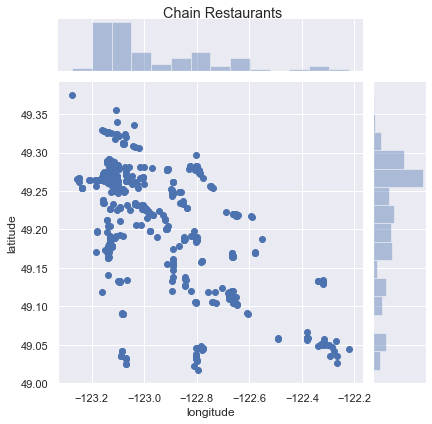

In [228]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=all_restaurant_chain)
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.suptitle('Chain Restaurants')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plot

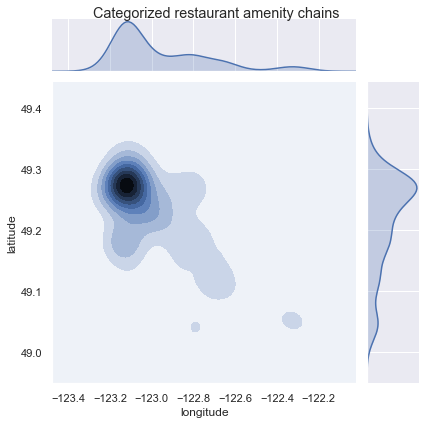

In [229]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=all_restaurant_chain,kind='kde')
plot.fig.suptitle('Categorized restaurant amenity chains')
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plot

In [230]:
print("The SD latitude (statistics performed) of categorized chains which are restaurants is: ", 
      all_restaurant_chain['lat'].std())
print("The SD longitude (statistics performed) of categorized chains which are restaurants is: ", 
      all_restaurant_chain['lon'].std())

The SD latitude (statistics performed) of categorized chains which are restaurants is:  0.07887321153820956
The SD longitude (statistics performed) of categorized chains which are restaurants is:  0.22680168491041855


In [231]:
print("The average latitude (statistics performed) of categorized chains which are restaurants is: ", 
      all_restaurant_chain['lat'].mean())
print("The average longitude (statistics performed) of categorized chains which are restaurants is: ", 
      all_restaurant_chain['lon'].mean())

The average latitude (statistics performed) of categorized chains which are restaurants is:  49.212175178836
The average longitude (statistics performed) of categorized chains which are restaurants is:  -122.96003503950608


# q1 continued

In [232]:
non_chain_restaurants_GROUPED = non_chain_restaurant.groupby(['name']).sum()
non_chain_restaurants_GROUPED

,lat,lon,total_branches
name,,,
0755 Restaurant & Lounge,49.185144,-123.130217,1
1029 Cafe,49.193752,-123.121261,1
16th Avenue Cafe,49.256999,-123.127023,1
17°C Dessert Café,49.242995,-123.060195,1
1827,49.169457,-122.579023,1
...,...,...,...
strEATS Aldergrove,49.059230,-122.492277,1
trattoria Burnaby,49.230169,-123.004036,1
yoko sushi,49.249358,-122.867573,1


In [233]:
chain_restaurants_GROUPED = chain_restaurants.groupby(['name']).sum()
chain_restaurants_GROUPED


,lat,lon,total_branches
name,,,
A&W,2706.584051,-6760.324363,3025
Al Basha,98.554411,-246.282234,4
Aperture Coffee Bar,98.511677,-246.211384,4
Arby's,98.099951,-245.582704,4
Asa Sushi,98.383277,-245.567405,4
...,...,...,...
YiFang Taiwan Fruit Tea,196.992234,-492.589383,16
Yolks,98.544176,-246.189287,4
Zaika Tastes of India,98.115437,-244.674484,4


In [234]:
restaurant_data.groupby(['name']).sum()

,lat,lon,total_branches
name,,,
0755 Restaurant & Lounge,49.185144,-123.130217,1
1029 Cafe,49.193752,-123.121261,1
16th Avenue Cafe,49.256999,-123.127023,1
17°C Dessert Café,49.242995,-123.060195,1
1827,49.169457,-122.579023,1
...,...,...,...
strEATS Aldergrove,49.059230,-122.492277,1
trattoria Burnaby,49.230169,-123.004036,1
yoko sushi,49.249358,-122.867573,1


# ALL RESTAURANTS 

In [235]:
"Here: We need to count the number of occcurences for BRANCHES***** e.g. Starbucks"
# source: https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
# SOURCE: "link:https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts"
".keys gives us the na#me - and if we comment it out "
#all_restaurants = restaurant_data['name','lat','lon'].to_frame()
all_restaurants = restaurant_data.loc[:,['name','lat','lon']]#.value_counts().to_frame() #> 1
#all_restaurants.columns=['count'] #rename column
coordinates = all_restaurants[['lat', 'lon']].values.tolist()
all_restaurants


,name,lat,lon
0,Starbucks,49.260812,-123.125736
1,Salad Loop,49.260953,-123.125704
13,Best Bite Indian Cuisine,49.126650,-123.182470
33,Tim Hortons,49.193580,-123.180788
52,Tim Hortons,49.228400,-122.848383
...,...,...,...
17707,Subway,49.263998,-123.173758
17712,House of Dosas,49.250408,-123.076261
17713,Creekside Coffee,49.278424,-122.806704
17714,Togo Sushi,49.278770,-122.797628


In [236]:
coordinates

[[49.260812, -123.125736],
 [49.260953, -123.125704],
 [49.1266497, -123.1824699],
 [49.1935797, -123.1807883],
 [49.2284004, -122.8483834],
 [49.212449, -122.9197493],
 [49.212659, -122.9193469],
 [49.1712762, -123.1348734],
 [49.1327053, -123.0991859],
 [49.1330103, -123.0955358],
 [49.2347493, -123.1547249],
 [49.2635825, -123.1288364],
 [49.1401463, -123.1378853],
 [49.1398614, -123.137394],
 [49.1486188, -123.1358921],
 [49.1330851, -123.0940869],
 [49.1329977, -123.0973124],
 [49.091207, -122.9564485],
 [49.0919518, -122.9576502],
 [49.2685718, -123.1045263],
 [49.2665754, -123.103744],
 [49.2779185, -122.912361],
 [49.278119, -122.9122848],
 [49.281302, -123.0575579],
 [49.2812984, -123.0573443],
 [49.2812866, -123.0550913],
 [49.2821554, -123.0998393],
 [49.2832655, -123.0978958],
 [49.2832876, -123.0980745],
 [49.2831728, -123.0935162],
 [49.2796054, -123.1002799],
 [49.2796207, -123.1011093],
 [49.2831638, -123.1035309],
 [49.2834234, -123.1064112],
 [49.2731066, -123.1007271

# Heat Map Of All Restaurants

In [237]:
#have decalred coordinates above
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
#incidents = folium.map.FeatureGroup()

van_map


In [238]:
HeatMap(coordinates).add_to(van_map) # THIS IS FOR ALL RESTAURANTS

In [239]:
van_map

# Density Plot all restaurants

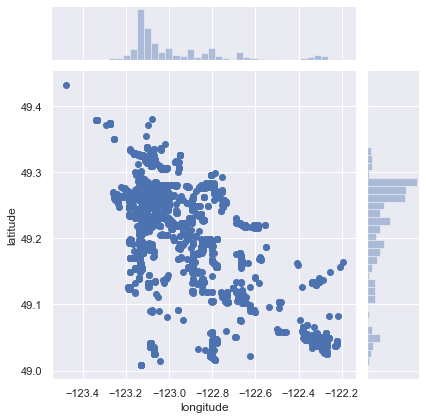

In [240]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=all_restaurants)
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot

In [241]:
chain_restaurants['lat'].mean()

49.21177500445521

In [242]:
chain_restaurants['lon'].mean()

-122.94328207262478

In [243]:
chain_restaurants['lat'].std()

0.07942586606394361

In [244]:
chain_restaurants['lon'].std()

0.24112138830275856

In [245]:
non_chain_restaurant['lon'].std()

0.22440195518824282

In [246]:
non_chain_restaurant['lat'].std()

0.07629406860021856

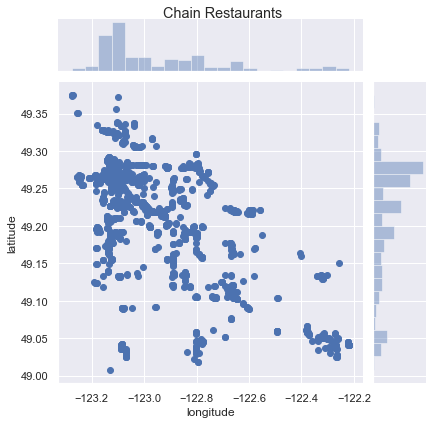

In [247]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=chain_restaurants)
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.suptitle('Chain Restaurants')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plot

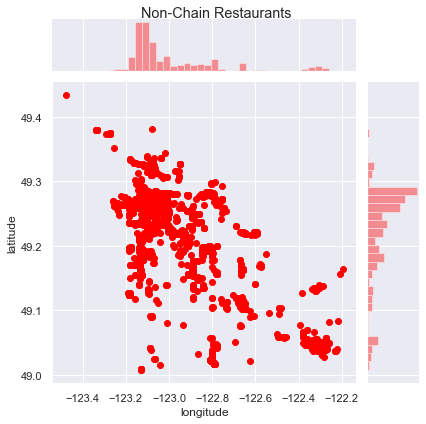

In [248]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=non_chain_restaurants_GROUPED,color='red')
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.suptitle('Non-Chain Restaurants')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plot

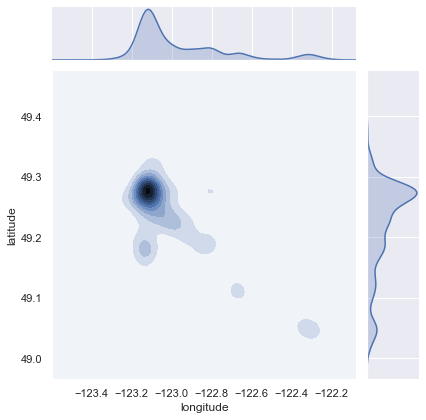

In [249]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=all_restaurants,kind='kde')
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot

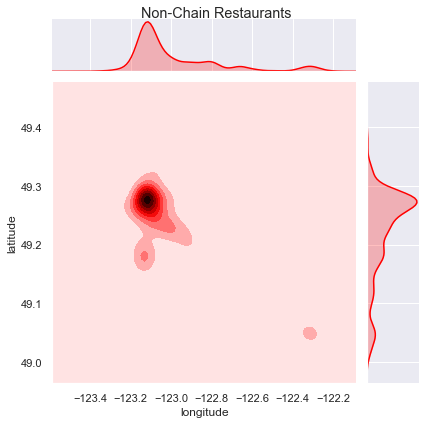

In [250]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=non_chain_restaurants_GROUPED,kind='kde',color='red')
plot.fig.suptitle('Non-Chain Restaurants')
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plot

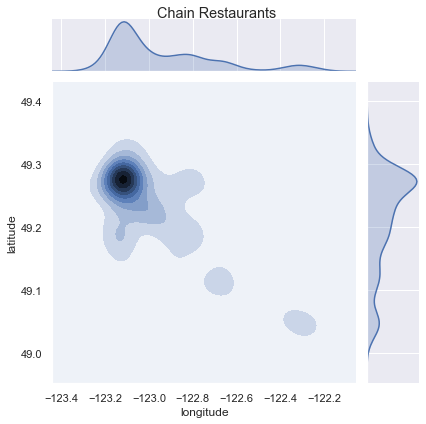

In [251]:
sns.set()
plot = sns.jointplot(x="lon", y="lat", data=chain_restaurants,kind='kde')
plot.fig.suptitle('Chain Restaurants')
plot.set_axis_labels(xlabel='longitude', ylabel='latitude')
plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plot

# AVG and S.D LAT AND LON - All restaurants

In [252]:
print("The average latitude (statistics performed) of restaurants is: ",all_restaurants['lat'].mean())

The average latitude (statistics performed) of restaurants is:  49.217883405268815


In [253]:
print("The average longitude (statistics performed) of restaurants is: ",all_restaurants['lon'].mean())

The average longitude (statistics performed) of restaurants is:  -122.9678191893757


In [254]:
print("The S.Dev of latitude (statistics performed) of restaurants is: ",all_restaurants['lat'].std())

The S.Dev of latitude (statistics performed) of restaurants is:  0.07772240960846756


In [255]:
print("The S.Dev of latitude (statistics performed) of restaurants is: ",all_restaurants['lon'].std())

The S.Dev of latitude (statistics performed) of restaurants is:  0.232122374642423


# Chain restaurants ALL GROUPED (not categorized)

In [256]:
chain_restaurants_GROUPED

,lat,lon,total_branches
name,,,
A&W,2706.584051,-6760.324363,3025
Al Basha,98.554411,-246.282234,4
Aperture Coffee Bar,98.511677,-246.211384,4
Arby's,98.099951,-245.582704,4
Asa Sushi,98.383277,-245.567405,4
...,...,...,...
YiFang Taiwan Fruit Tea,196.992234,-492.589383,16
Yolks,98.544176,-246.189287,4
Zaika Tastes of India,98.115437,-244.674484,4


In [257]:
# not useful 
#print("The average latitude (statistics performed) of chain restaurant is: ", chain_restaurants_GROUPED['lat'].mean())

In [258]:
# not useful 
#print("The average longitude (statistics performed) of chain restaurant is: ", chain_restaurants_GROUPED['lon'].mean())

In [259]:
# not useful 
#print("The S.Dev of latitude (statistics performed) of chain restaurants is: ",chain_restaurants_GROUPED['lat'].std())

In [260]:
#not useful
#print("The S.Dev of longitude (statistics performed) of chain restaurants is: ",chain_restaurants_GROUPED['lon'].std())

# AVG and S.D LAT AND LON - Non-Chain restaurants 

In [261]:
non_chain_restaurants_GROUPED

,lat,lon,total_branches
name,,,
0755 Restaurant & Lounge,49.185144,-123.130217,1
1029 Cafe,49.193752,-123.121261,1
16th Avenue Cafe,49.256999,-123.127023,1
17°C Dessert Café,49.242995,-123.060195,1
1827,49.169457,-122.579023,1
...,...,...,...
strEATS Aldergrove,49.059230,-122.492277,1
trattoria Burnaby,49.230169,-123.004036,1
yoko sushi,49.249358,-122.867573,1


In [262]:
print("The average latitude (statistics performed) of non-chain restaurants is: ", non_chain_restaurants_GROUPED['lat'].mean())

The average latitude (statistics performed) of non-chain restaurants is:  49.22199465914033


In [263]:
print("The average longitude (statistics performed) of non-chain restaurants is: ", non_chain_restaurants_GROUPED['lon'].mean())

The average longitude (statistics performed) of non-chain restaurants is:  -122.98433387453073


In [264]:
print("The S.Dev of latitude (statistics performed) of chain restaurants is: ",non_chain_restaurants_GROUPED['lat'].std())

The S.Dev of latitude (statistics performed) of chain restaurants is:  0.0762940686002185


In [265]:
print("The S.Dev of longitude (statistics performed) of chain restaurants is: ",non_chain_restaurants_GROUPED['lon'].std())

The S.Dev of longitude (statistics performed) of chain restaurants is:  0.22440195518824266


# AVG and S.D LAT AND LON - Chain restaurants 

In [266]:
print("The average latitude (statistics performed) of non-chain restaurants is: ", non_chain_restaurants_GROUPED['lat'].mean())

The average latitude (statistics performed) of non-chain restaurants is:  49.22199465914033


# Heat Map Chain Restaurant

In [267]:
#have decalred coordinates above
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
van_map

In [268]:
#incidents = folium.Map.FeatureGroup()
#incidents

In [269]:
coordinates_chain = chain_restaurants[['lat', 'lon']].values.tolist()
#coordinates

In [270]:
HeatMap(coordinates_chain).add_to(van_map)
van_map

# Non-Chain Restaurants

In [271]:
#non_chain_restaurants = dataframecounts [dataframecounts['name'] == 1] 
#non_chain_restaurants.columns=['count_non_chain']
#non_chain_restaurants
#have decalred coordinates above
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
van_map

In [272]:
non_chain_restaurant

,lat,lon,timestamp,amenity,name,tags,total_branches
13,49.126650,-123.182470,2020-03-30T09:08:51.000-07:00,restaurant,Best Bite Indian Cuisine,"{'addr:housenumber': '10-3891', 'phone': '+1-6...",1
58,49.171276,-123.134873,2019-10-27T17:08:25.000-07:00,restaurant,Oriental Rice Noodle,"{'addr:housenumber': '8100', 'phone': '+1-604-...",1
89,49.148619,-123.135892,2009-09-01T22:49:26.000-07:00,fast_food,Pizza Hut (takeout),{},1
115,49.268572,-123.104526,2018-10-26T20:30:44.000-07:00,cafe,Argo Cafe,"{'addr:housenumber': '1836', 'addr:street': 'O...",1
300,49.281302,-123.057558,2019-09-13T13:57:03.000-07:00,restaurant,Tacofino Commissary,"{'addr:housenumber': '2327', 'addr:street': 'E...",1
...,...,...,...,...,...,...,...
17699,49.219011,-122.928008,2018-02-12T04:09:16.000-08:00,cafe,Raw Cuts Sandwich Shop,"{'addr:housenumber': '7885', 'level': '0', 'ad...",1
17701,49.262659,-123.251745,2019-11-04T20:07:41.000-08:00,cafe,Magma Cafè,"{'wheelchair': 'yes', 'addr:housenumber': '633...",1
17712,49.250408,-123.076261,2017-07-08T05:22:57.000-07:00,restaurant,House of Dosas,"{'addr:housenumber': '1391', 'phone': '+1-604-...",1
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{},1


In [273]:
#coordinates_chain = chain_restaurants[['lat', 'lon']].values.tolist()
coordinates_non_chain = non_chain_restaurant[['lat', 'lon']].values.tolist()
coordinates_non_chain


[[49.1266497, -123.1824699],
 [49.1712762, -123.1348734],
 [49.1486188, -123.1358921],
 [49.2685718, -123.1045263],
 [49.281302, -123.0575579],
 [49.2812984, -123.0573443],
 [49.2812866, -123.0550913],
 [49.2832655, -123.0978958],
 [49.2832876, -123.0980745],
 [49.2831728, -123.0935162],
 [49.2796054, -123.1002799],
 [49.2796207, -123.1011093],
 [49.2831638, -123.1035309],
 [49.2834234, -123.1064112],
 [49.2427766, -123.0040514],
 [49.2873953, -123.1288386],
 [49.2866244, -123.1282577],
 [49.287665, -123.1292506],
 [49.2867409, -123.1284213],
 [49.2875709, -123.1291089],
 [49.2873728, -123.1282271],
 [49.2871553, -123.1290789],
 [49.2870445, -123.128902],
 [49.2874858, -123.1289807],
 [49.2865615, -123.1281828],
 [49.2864194, -123.1272344],
 [49.2623529, -123.0894813],
 [49.2660115, -123.2423353],
 [49.2814778, -123.1336029],
 [49.2764267, -122.849875],
 [49.2842686, -123.1197597],
 [49.2641324, -123.1816701],
 [49.2863279, -123.1256179],
 [49.285993500000004, -123.1250868],
 [49.28525

In [274]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
van_map
HeatMap(coordinates_non_chain).add_to(van_map)
van_map

In [275]:
van_map = folium.Map(location=VANCOUVER_COORDINATES, zoom_start=10)
#coordinates_restaurant_chain = all_restaurant_chain[['lat', 'lon']].values.tolist()
#coordinates_non_chain

for i in range(0, len(coordinates_non_chain)):
    folium.Marker(coordinates_non_chain[i]).add_to(van_map)
van_map

In [276]:
"tested code didn't use"
#looping through names
#temp = []
#list_unique_restaurant = []
#for i in range(np.size(restaurantnames)):
#    temp = restaurant_data[ (restaurant_data.name == restaurantnames[i])]
#    print("size of temp is: ",np.size(temp))
#    if(np.size(temp) > 1): #chain restaurant
#        temp = [] 
#        continue
#    else:
#        list_unique_restaurant.append(temp)
#        temp = []
#        print("size of list unique resto is: ",np.size(list_unique_restaurant))


    
#print(list_unique_restaurant)
#np.size(list_unique_restaurant) #16608

"tested code didn't use"